In [86]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data = pd.merge(mouse_metadata,study_results, on = "Mouse ID")
# Display the data table for preview
data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [87]:
# Checking the number of mice
mice = len(data["Mouse ID"].unique())
print(f"{mice} mice were observed in this study")

249 mice were observed in this study


In [88]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates= data.duplicated(subset=['Mouse ID', 'Timepoint'])

In [89]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = data[duplicates]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [90]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
data_clean = data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='last')
data_clean = data_clean.rename(columns = {'Weight (g)' : ' Weight', 'Tumor Volume (mm3)': 'Tumor_Volume',
                                          'Metastatic Sites' : 'Metastatic_Sites'})
data_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight,Timepoint,Tumor_Volume,Metastatic_Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [91]:
# Checking the number of mice in the clean DataFrame.
clean_mice =  len(data_clean["Mouse ID"].unique())
print(f"{clean_mice} mice were observed in this study, after cleaning the database")

249 mice were observed in this study, after cleaning the database


In [92]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


by_drug = data_clean.groupby(['Drug Regimen'])
mean = by_drug.Tumor_Volume.mean()
median = by_drug.Tumor_Volume.median()
variance =  by_drug.Tumor_Volume.var()
sd = by_drug.Tumor_Volume.std()
st_error = by_drug.Tumor_Volume.sem()

pd.DataFrame({"Mean" : mean, "Median" : median, "Variance" : variance, "Standard Deviation" : sd, "SEM" : st_error})


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


(0.0, 240.0)

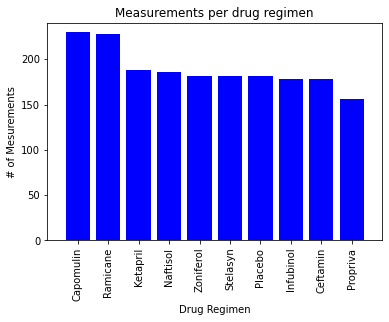

In [103]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measurements = data_clean['Drug Regimen'].value_counts()
measurements.plot(kind='bar', title ='Measurements per drug regimen', facecolor = 'b', width = 0.8)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Mesurements')
plt.xlim(-1, len(measurements))
plt.ylim(0,240)

(0.0, 240.0)

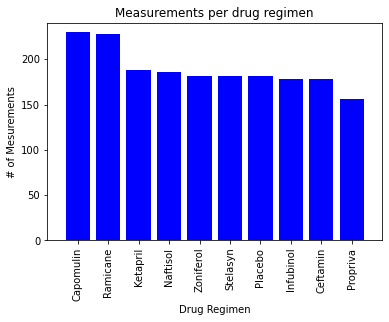

In [104]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(measurements.index.tolist(),measurements, color = 'b', width = 0.8)
plt.xticks(rotation='vertical')
plt.title('Measurements per drug regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Mesurements')
plt.xlim(-1, len(measurements))
plt.ylim(0,240)

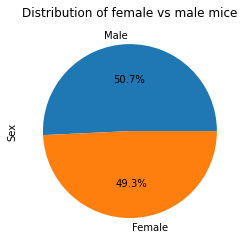

In [112]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = data_clean['Sex'].value_counts()
gender.plot(kind='pie', title ='Distribution of female vs male mice',  autopct="%1.1f%%")

Text(0, 0.5, 'Sex')

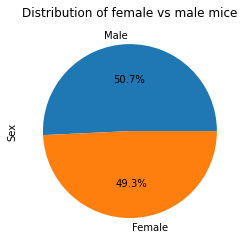

In [114]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = gender.index.tolist()
plt.pie(gender, labels=labels,  autopct="%1.1f%%")
plt.title('Distribution of female vs male mice')
plt.ylabel('Sex')


In [115]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

g = data_clean.groupby(['Mouse ID'])
g.count().head(20)


,Drug Regimen,Sex,Age_months,Weight,Timepoint,Tumor_Volume,Metastatic_Sites
Mouse ID,,,,,,,
a203,10,10,10,10,10,10,10
a251,10,10,10,10,10,10,10
a262,10,10,10,10,10,10,10
a275,10,10,10,10,10,10,10
a366,7,7,7,7,7,7,7
a401,10,10,10,10,10,10,10
a411,10,10,10,10,10,10,10
a444,10,10,10,10,10,10,10
a457,3,3,3,3,3,3,3
